In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# **Necessary Modules**

In [107]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import r2_score

In [63]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
df.shape

(500, 9)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**No missing values are there!**

In [66]:
df.duplicated().sum()

0

# **Splitting into Dependent and Independent Features**

In [67]:
X = df.iloc[:, 1:-1]
y = df['Chance of Admit ']

# **Applying Train Test Split**

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Applying Min Max Scaler**

**Applying MIn Max because we have bounded range data, means we already know that our data will inside that particular range(Lowe and Upper Bounds)**

**That's why we use Min Max for images too, because we already knows that the pexels values will be in 0 - 255 range**

In [69]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Creation**

In [115]:
model = Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [117]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
history = model.fit(X_train_scaled, y_train, epochs = 50, validation_split = 0.1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0783 - val_loss: 0.0671
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0630 - val_loss: 0.0566
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0506 - val_loss: 0.0454
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361 - val_loss: 0.0368
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - val_loss: 0.0294
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - val_loss: 0.0233
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - val_loss: 0.0159
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0136
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0123
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0109
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - val_l

# **Model Evaluation**

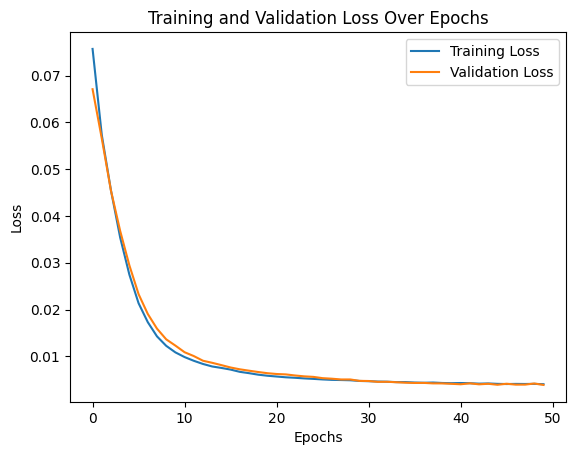

In [121]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

# **Making Predictions**

In [119]:
y_hat = model.predict(X_test_scaled)
y_hat

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.9063813 ],
       [0.83228195],
       [0.5543324 ],
       [0.7049527 ],
       [0.8142215 ],
       [0.8677834 ],
       [0.56467336],
       [0.6309381 ],
       [0.8412025 ],
       [0.81033546],
       [0.6807116 ],
       [0.7041079 ],
       [0.64031816],
       [0.91960603],
       [0.82720786],
       [0.5208939 ],
       [0.83244354],
       [0.63396186],
       [0.5611736 ],
       [0.59864193],
       [0.6854047 ],
       [0.5505971 ],
       [0.7616948 ],
       [0.78813547],
       [0.76642513],
       [0.6296379 ],
       [0.9588796 ],
       [0.8614298 ],
       [0.6286153 ],
       [0.78150207],
       [0.5820564 ],
       [0.681149  ],
       [0.507481  ],
       [0.8752479 ],
       [0.6587233 ],
       [0.7385148 ],
       [0.6192558 ],
       [0.9697258 ],
       [0.68873864],
       [0.77520907],
       [0.9642324 ],
       [0.6076106 ],
       [0.67956907],
       [0.86949825],
       [0.9166662 ],
       [0.5572235 ],
       [0.95374256],
       [0.840

In [120]:
r2 = r2_score(y_test, y_hat)
print("R² Score:", r2)

R² Score: 0.8176894417960704
